In [1]:
# https://towardsdatascience.com/algorithmic-trading-in-python-simple-moving-averages-7498245b10b
# Loading up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading up csv
spy = pd.read_csv(r"./csv/data_3600.csv")

In [29]:
# Defining Functions
def showPlot(data):
    plt.plot(data)
    plt.show()

def getSMA(windowSize, data):
    return data.rolling(window = windowSize).mean()

def get_points_above(sma_low, sma_high):
    points_above = {}
    for pair in zip(sma_low, sma_high):
        if pair[0] >= pair[1]:
            date = sma_low[sma_low == pair[0]].index[0]
            points_above[date] = pair[0]
            
    points_above = pd.Series(points_above, name='Price_Points')
    points_above.index.name = 'Date'
            
    return points_above

In [41]:
SMA10 = spy['Price'].rolling(window = 10).mean()
SMA20 = spy['Price'].rolling(window = 20).mean()
SMA50 = spy['Price'].rolling(window = 50).mean()
SMA100 = spy['Price'].rolling(window = 100).mean()

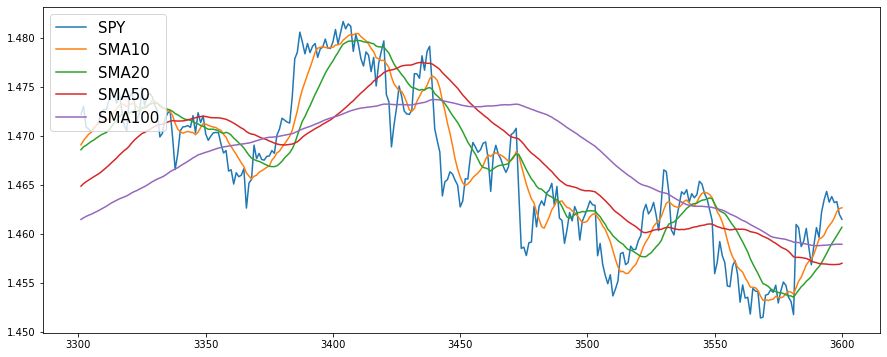

In [42]:
# taking last 300 trading days
plt.figure(figsize=(15, 6))
plt.plot(spy['Price'][-300:], label='SPY')
plt.plot(SMA10[-300:], label='SMA10')
plt.plot(SMA20[-300:], label='SMA20')
plt.plot(SMA50[-300:], label='SMA50')
plt.plot(SMA100[-300:], label='SMA100')
plt.legend(loc='upper left', fontsize=15)

In [43]:
points_above_SMA50 = get_points_above(SMA20, SMA50)

In [44]:
SMA20 = SMA20.reset_index()
SMA50 = SMA50.reset_index()

In [45]:
crossovers = pd.DataFrame()
crossovers['index'] = SMA20['index']
crossovers['Price'] = [i for i in spy['Price']]
crossovers['SMA20'] = SMA20['Price']
crossovers['SMA50'] = SMA50['Price']
crossovers['position'] = crossovers['SMA20'] >= crossovers['SMA50']
crossovers['pre-position'] = crossovers['position'].shift(1)
crossovers['Crossover'] = np.where(crossovers['position'] == crossovers['pre-position'], False, True)
crossovers['Crossover'][0] = False
print(crossovers)

      index    Price     SMA20     SMA50  position pre-position  Crossover
0         0  1.25460       NaN       NaN     False          NaN      False
1         1  1.25670       NaN       NaN     False        False      False
2         2  1.25770       NaN       NaN     False        False      False
3         3  1.25790       NaN       NaN     False        False      False
4         4  1.25930       NaN       NaN     False        False      False
...     ...      ...       ...       ...       ...          ...        ...
3596   3596  1.46380  1.458992  1.456868      True         True      False
3597   3597  1.46318  1.459397  1.456860      True         True      False
3598   3598  1.46328  1.459824  1.456877      True         True      False
3599   3599  1.46198  1.460246  1.456889      True         True      False
3600   3600  1.46148  1.460664  1.457000      True         True      False

[3601 rows x 7 columns]


/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17627/1220349200.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Crossover'][0] = False


In [46]:
crossovers = crossovers.loc[crossovers['Crossover'] == True]
crossovers = crossovers.reset_index()
crossovers = crossovers.drop(['position', 'pre-position', 'Crossover', 'index'], axis=1)
crossovers['Signal'] = np.nan
crossovers['Binary_Signal'] = 0.0
for i in range(len(crossovers['SMA20'])):
    if crossovers['SMA20'][i] > crossovers['SMA50'][i]:
        crossovers['Binary_Signal'][i] = 1.0
        crossovers['Signal'][i] = 'Buy'
    else:
        crossovers['Signal'][i] = 'Sell'
print(crossovers)

    level_0    Price     SMA20     SMA50 Signal  Binary_Signal
0        58  1.27960  1.266400  1.265840    Buy            1.0
1       266  1.37096  1.361767  1.361793   Sell            0.0
2       293  1.35415  1.362184  1.362074    Buy            1.0
3       297  1.35409  1.360820  1.361026   Sell            0.0
4       333  1.35581  1.354478  1.354025    Buy            1.0
..      ...      ...       ...       ...    ...            ...
80     3386  1.47849  1.470009  1.469372    Buy            1.0
81     3426  1.47506  1.476587  1.476989   Sell            0.0
82     3532  1.46418  1.460995  1.460657    Buy            1.0
83     3559  1.45586  1.460152  1.460473   Sell            0.0
84     3592  1.46219  1.457049  1.456943    Buy            1.0

[85 rows x 6 columns]


/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17627/3479218156.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Binary_Signal'][i] = 1.0
/var/folders/gf/px41l6s15f3fffhq5nk6h4f80000gp/T/ipykernel_17627/3479218156.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crossovers['Signal'][i] = 'Buy'
/Users/reinieldanpablo/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

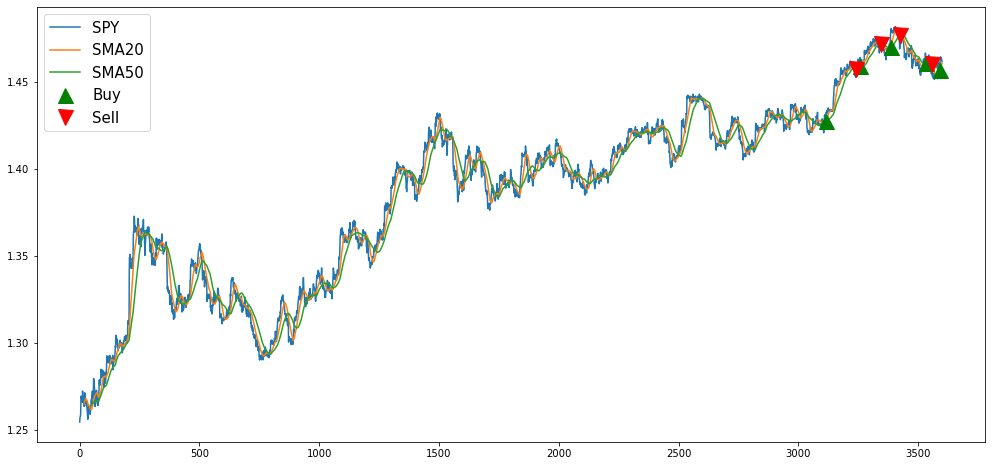

In [47]:
# taking last 600 trading days
SMA20 = spy['Price'].rolling(window=20).mean()
SMA50 = spy['Price'].rolling(window=50).mean()
plt.figure(figsize=(17, 8))
plt.plot(spy['Price'], label='SPY')
plt.plot(SMA20, label='SMA20')
plt.plot(SMA50, label='SMA50')
plt.plot(crossovers.loc[crossovers.Signal == 'Buy']['level_0'][-5:], 
         crossovers['SMA20'][crossovers.Signal == 'Buy'][-5:],
        '^', markersize=15, color='g', label='Buy')
plt.plot(crossovers.loc[crossovers.Signal == 'Sell']['level_0'][-4:], 
         crossovers['SMA20'][crossovers.Signal == 'Sell'][-4:],
        'v', markersize=15, color='r', label='Sell')
plt.legend(loc='upper left', fontsize=15)